# Data Cleaning and Preprocessing Pipeline

This notebook performs comprehensive data cleaning and preprocessing on the dataset. The following steps are executed:

1. **Data Loading** - Read raw data from CSV file
2. **Data Exploration** - Examine structure and statistics
3. **String/DateTime Handling** - Convert and clean non-numeric columns
4. **Missing Values** - Identify and handle null values
5. **Duplicates** - Remove duplicate rows
6. **Correlation Analysis** - Identify and remove highly correlated features
7. **Categorical Variables** - Encode categorical columns using one-hot encoding
8. **Continuous Variables** - Bin continuous features into quantiles
9. **Visualization** - Create plots to understand data distribution
10. **Outlier Detection** - Remove outliers using IQR method
11. **Export** - Save cleaned dataset to CSV

The output will be a cleaned, preprocessed dataset ready for machine learning model training.

In [ ]:
# Step 1: Load and Display Raw Data
# This step reads the CSV file into a pandas DataFrame and displays the first few rows
# to understand the structure and format of the data.

import pandas as pd
df = pd.read_csv('new_train_EGN5442.csv')
print(df.head())

   Unnamed: 0  y      x2      x3  x5  x9  x10  x11  x12  x13  ... x23   x24  \
0           0  1  #54359  Female  50   5    5    5    4    3  ...  21  12.0   
1           1  1  #84649  Female  44   1    1    1    1    3  ...   0   0.0   
2           2  0  #59015  Female  72   3    1    5    5    3  ...   0   8.0   
3           3  0  #99990  Female  38   1    3    1    3    5  ...   0   0.0   
4           4  1  #83569    Male  37   5    5    5    5    2  ...   0   0.0   

   x25  x26  x28       x29  x30       x31  x4  x6  
0  D_C   Bt    1   (192&&)  NaN  2.380952   4  50  
1  L_C   Bt    1  (1034&&)  NaN       inf   4  44  
2  L_C   Bt    3  (1452&&)  NaN       inf   4  72  
3  L_C   PT    3   (916&&)  NaN       inf   4  38  
4  L_C   Bt    1   (390&&)  NaN       inf   4  37  

[5 rows x 29 columns]


In [ ]:
# Examine the data structure and statistics
# info() shows data types and non-null counts
# nunique() shows the number of unique values in each column
# describe() provides statistical summary (mean, std, min, max, quartiles)

print("Dataset Info:")
print(df.info())
print(df.nunique())
print("\n" + "="*50 + "\n")

print("Statistical Summary:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104722 entries, 0 to 104721
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  104722 non-null  int64  
 1   y           104722 non-null  int64  
 2   x2          104722 non-null  object 
 3   x3          104722 non-null  object 
 4   x5          104722 non-null  int64  
 5   x9          104722 non-null  int64  
 6   x10         104722 non-null  int64  
 7   x11         104722 non-null  int64  
 8   x12         104722 non-null  int64  
 9   x13         104722 non-null  int64  
 10  x14         104722 non-null  object 
 11  x15         104722 non-null  int64  
 12  x16         104722 non-null  int64  
 13  x17         104722 non-null  int64  
 14  x18         104722 non-null  int64  
 15  x19         104722 non-null  int64  
 16  x20         104722 non-null  int64  
 17  x21         104722 non-null  int64  
 18  x22         104722 non-null  int64  
 19  x2

c:\Users\rohan\anaconda3\envs\sensor\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


## Step 2: Data Exploration and Statistical Summary

In this step, we examine:
- **Data types** of each column using `.info()`
- **Unique values** in each column to identify categorical vs continuous features
- **Statistical summary** using `.describe()` to understand data distribution and identify potential outliers

In [3]:
df

,Unnamed: 0,y,x2,x3,x5,x9,x10,x11,x12,x13,...,x23,x24,x25,x26,x28,x29,x30,x31,x4,x6
0,0,1,#54359,Female,50,5,5,5,4,3,...,21,12.0,D_C,Bt,1,(192&&),NaN,2.380952,4,50
1,1,1,#84649,Female,44,1,1,1,1,3,...,0,0.0,L_C,Bt,1,(1034&&),NaN,inf,4,44
2,2,0,#59015,Female,72,3,1,5,5,3,...,0,8.0,L_C,Bt,3,(1452&&),NaN,inf,4,72
3,3,0,#99990,Female,38,1,3,1,3,5,...,0,0.0,L_C,PT,3,(916&&),NaN,inf,4,38
4,4,1,#83569,Male,37,5,5,5,5,2,...,0,0.0,L_C,Bt,1,(390&&),NaN,inf,4,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,104717,1,#30483,Male,27,5,5,5,5,5,...,70,38.0,L_C,Bt,1,(1371&&),NaN,0.385714,4,27
104718,104718,0,#23530,Female,62,1,4,4,4,4,...,6,33.0,L_C,Bt,2,(1703&&),NaN,10.333333,4,62
104719,104719,0,#88477,Male,45,3,4,3,5,1,...,16,7.0,L_C,PT,3,(562&&),NaN,2.812500,4,45
104720,104720,0,#17164,Male,57,2,4,2,2,4,...,0,0.0,L_C,PT,2,(315&&),NaN,inf,4,57


## Display Full Dataset

View the entire dataset to get a complete overview:

In [ ]:
# Step 3: Handle String and Data Type Conversions
# First, identify all object (string) type columns and count unique values

print("Object (String) columns and their unique value counts:")
for i in df.dtypes[df.dtypes == 'object'].index:
    print(f"  {i}: {df[i].nunique()} unique values")

# Clean x2: Remove '#' and convert to integer
df['x2'] = df['x2'].str.replace('#','').astype(int)

# Clean x29: Remove '&&', '(', ')' and convert to integer
df['x29'] = df['x29'].str.replace('&&','')
df['x29'] = df['x29'].str.replace('(','')
df['x29'] = df['x29'].str.replace(')','')
df['x29'] = df['x29'].astype(int)
df

df.drop(labels=['Unnamed: 0','x30'],inplace=True,axis=1)

x2: 103904 unique values
x3: 2 unique values
x14: 6 unique values
x25: 2 unique values
x26: 2 unique values
x29: 3802 unique values


C:\Users\rohan\AppData\Local\Temp\ipykernel_22872\3574092127.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['x29'] = df['x29'].str.replace('(','')
C:\Users\rohan\AppData\Local\Temp\ipykernel_22872\3574092127.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['x29'] = df['x29'].str.replace(')','')


## Step 3: Handle String and Data Type Conversions

Identify and clean columns with object (string) data types:
- **x2**: Contains '#' characters that need to be removed and converted to integer
- **x29**: Contains '(', ')', and '&&' characters that need to be removed and converted to integer
- **Unnamed: 0** and **x30**: Unnecessary columns that will be dropped

This step uses string manipulation methods (`.str.replace()`) and type conversion (`.astype()`).

In [ ]:
# 4. Are there any missing data? How to deal with the missing data?

df.isnull().sum()
df['x24'].value_counts()

df['x24'].fillna(0, inplace=True)

print("\nMissing values after filling:")
print(df.isnull().sum())

## Step 4: Handle Missing Values

Check for null/missing values in the dataset:
- Count missing values per column
- Use appropriate filling strategies (mean, median, mode, or forward fill)
- In this case, column **x24** has missing values that will be filled with 0

In [ ]:
# Step 5: Remove Duplicate Rows
# Check for duplicate rows

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates (keeps first occurrence by default)
df.drop_duplicates(inplace=True)

print(f"Shape after removing duplicates: {df.shape}")
print(f"Duplicates remaining: {df.duplicated().sum()}")

## Step 5: Remove Duplicate Rows

Identify and remove exact duplicate rows from the dataset:
- Duplicate rows can skew model training and create data leakage
- Keep only the first occurrence of duplicates

In [7]:
df

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,...,x22,x23,x24,x25,x26,x28,x29,x31,x4,x6
0,1,54359,Female,50,5,5,5,4,3,5,...,3,21,12.0,D_C,Bt,1,192,2.380952,4,50
1,1,84649,Female,44,1,1,1,1,3,3,...,2,0,0.0,L_C,Bt,1,1034,inf,4,44
2,0,59015,Female,72,3,1,5,5,3,2,...,2,0,8.0,L_C,Bt,3,1452,inf,4,72
3,0,99990,Female,38,1,3,1,3,5,1,...,5,0,0.0,L_C,PT,3,916,inf,4,38
4,1,83569,Male,37,5,5,5,5,2,5,...,5,0,0.0,L_C,Bt,1,390,inf,4,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,1,30483,Male,27,5,5,5,5,5,5,...,5,70,38.0,L_C,Bt,1,1371,0.385714,4,27
104718,0,23530,Female,62,1,4,4,4,4,2,...,3,6,33.0,L_C,Bt,2,1703,10.333333,4,62
104719,0,88477,Male,45,3,4,3,5,1,3,...,1,16,7.0,L_C,PT,3,562,2.812500,4,45
104720,0,17164,Male,57,2,4,2,2,4,2,...,4,0,0.0,L_C,PT,2,315,inf,4,57


## Step 6: Handle Highly Correlated Features

Analyze correlation between features:
- Perfect correlation (r = 1.0) indicates redundant features
- Remove one feature from each perfectly correlated pair to reduce multicollinearity
- Features **x5** and **x4** show perfect correlation with other features and will be dropped

In [ ]:
# Step 6: Handle Highly Correlated Features
# Calculate correlation matrix

corr = df.corr()

# Find perfectly correlated pairs (correlation = 1.0)
perfect_corr = [(i, j, corr.loc[i, j]) for i in corr.columns for j in corr.columns
                if i != j and abs(corr.loc[i, j]) == 1]

print("Perfectly correlated feature pairs:")
print(perfect_corr)

# Drop redundant features from perfectly correlated pairs
df.drop(labels=['x5'], inplace=True, axis=1)
df.drop(labels=['x4'], inplace=True, axis=1)

print("Dropped features: x5, x4")

# Also drop x31 and x29 (additional features to be removed)
df.drop(labels=['x31', 'x29'], inplace=True, axis=1)

print("Also dropped: x31, x29")
print(f"\nDataset shape: {df.shape}")

[('x5', 'x6', 1.0), ('x6', 'x5', 1.0)]


C:\Users\rohan\AppData\Local\Temp\ipykernel_22872\3308561381.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [9]:
df.head()

df.drop(labels=['x31','x29',],inplace=True,axis=1)

## Step 7: One-Hot Encode Categorical Variables

Convert categorical features using one-hot encoding:
- **x25, x26, x3, x14**: Categorical columns to be encoded
- **drop_first=True**: Helps prevent multicollinearity (dummy variable trap)
- Creates binary columns for each category value

In [ ]:
# Step 7: Explore and Encode Categorical Variables

# Identify all remaining object (string) type columns
print("Remaining object (string) columns and unique value counts:")
for i in df.dtypes[df.dtypes == 'object'].index:
    print(f"  {i}: {df[i].nunique()} unique values")

# Apply one-hot encoding to categorical columns
# drop_first=True prevents multicollinearity by dropping the first category
df = pd.get_dummies(df, columns=['x25','x26','x3','x14'], drop_first=True)

print("\nDataset after one-hot encoding:")
print(df.head())

x3: 2 unique values
x14: 6 unique values
x25: 2 unique values
x26: 2 unique values


,y,x2,x9,x10,x11,x12,x13,x15,x16,x17,...,x28,x6,x25_L_C,x26_PT,x3_Male,x14_1,x14_2,x14_3,x14_4,x14_5
0,1,54359,5,5,5,4,3,3,3,4,...,1,50,0,0,0,0,0,0,0,1
1,1,84649,1,1,1,1,3,1,4,4,...,1,44,1,0,0,0,0,1,0,0
2,0,59015,3,1,5,5,3,2,3,3,...,3,72,1,0,0,0,1,0,0,0
3,0,99990,1,3,1,3,5,5,5,2,...,3,38,1,1,0,1,0,0,0,0
4,1,83569,5,5,5,5,2,5,4,4,...,1,37,1,0,1,0,0,0,0,1


In [ ]:
# Step 8: Drop Additional Features
# Remove x2 feature

df.drop(labels=['x2'], inplace=True, axis=1)
print("Dropped feature: x2")

## Step 8: Drop Additional Features

Remove feature **x2** that may not be useful for modeling:

In [ ]:
# Step 9: Verify Data Types and Dataset Info
# Confirm all columns are numeric types

print("Dataset Information:")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 104721
Data columns (total 26 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   y        103904 non-null  int64  
 1   x9       103904 non-null  int64  
 2   x10      103904 non-null  int64  
 3   x11      103904 non-null  int64  
 4   x12      103904 non-null  int64  
 5   x13      103904 non-null  int64  
 6   x15      103904 non-null  int64  
 7   x16      103904 non-null  int64  
 8   x17      103904 non-null  int64  
 9   x18      103904 non-null  int64  
 10  x19      103904 non-null  int64  
 11  x20      103904 non-null  int64  
 12  x21      103904 non-null  int64  
 13  x22      103904 non-null  int64  
 14  x23      103904 non-null  int64  
 15  x24      103904 non-null  float64
 16  x28      103904 non-null  int64  
 17  x6       103904 non-null  int64  
 18  x25_L_C  103904 non-null  uint8  
 19  x26_PT   103904 non-null  uint8  
 20  x3_Male  103904 non-null  

## Step 9: Verify Data Types

Check that all columns are now numeric and ready for modeling:

In [ ]:
# Step 10: Bin Continuous Variables into Quantiles
# For each continuous column, create a binned version using quartiles

continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns

print(f"Creating binned versions for {len(continuous_cols)} continuous columns...")

for col in continuous_cols:
    df[col + '_binned'] = pd.qcut(df[col], q=4, labels=False, duplicates='drop')

print(f"Binned columns created: {[col for col in df.columns if '_binned' in col]}")
print(f"\nDataset shape after binning: {df.shape}")

## Step 10: Bin Continuous Variables into Quantiles

Convert continuous features into categorical bins based on quantiles:
- **Binning**: Divide continuous ranges into discrete intervals
- **Quantiles**: Use quartiles (q=4) to create equal-frequency bins
- Creates new binned versions of each continuous feature for feature engineering

In [14]:
df

,y,x9,x10,x11,x12,x13,x15,x16,x17,x18,...,x17_binned,x18_binned,x19_binned,x20_binned,x21_binned,x22_binned,x23_binned,x24_binned,x28_binned,x6_binned
0,1,5,5,5,4,3,3,3,4,5,...,1,2,2,0,1,1,1,0,0,2
1,1,1,1,1,1,3,1,4,4,4,...,1,1,1,1,1,0,0,0,0,2
2,0,3,1,5,5,3,2,3,3,3,...,1,1,0,0,0,0,0,0,1,3
3,0,1,3,1,3,5,5,5,2,4,...,0,1,1,0,1,3,0,0,1,1
4,1,5,5,5,5,2,5,4,4,4,...,1,1,1,1,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,1,5,5,5,5,5,5,5,3,2,...,1,0,2,0,2,3,1,1,0,0
104718,0,1,4,4,4,4,4,1,1,1,...,0,0,0,0,0,1,0,1,0,3
104719,0,3,4,3,5,1,1,1,3,3,...,1,1,2,0,1,0,1,0,1,2
104720,0,2,4,2,2,4,4,4,3,4,...,1,1,2,0,0,2,0,0,0,3


## Step 11: Data Visualization

Create visualizations to understand data distributions and relationships:

Text(0.5, 1.0, 'Correlation Heatmap')

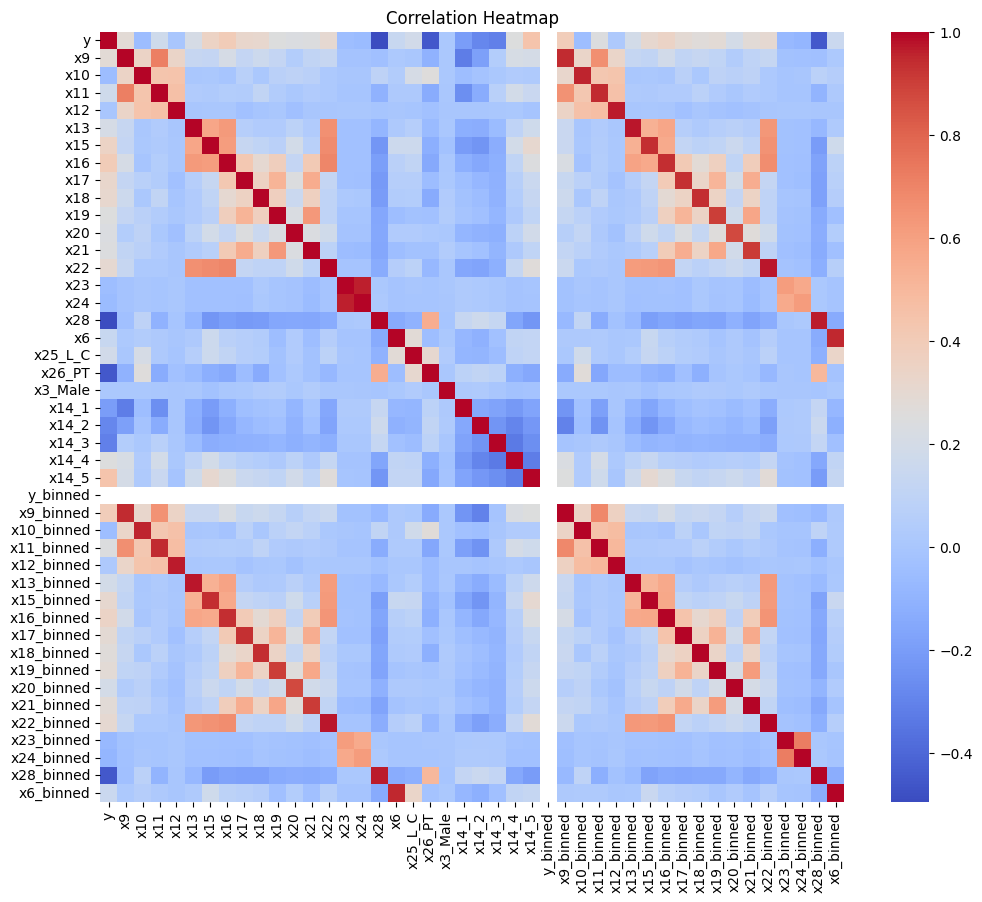

In [ ]:
# Step 11a: Correlation Heatmap
# Visualize correlations between all numeric features

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of All Features')
plt.tight_layout()

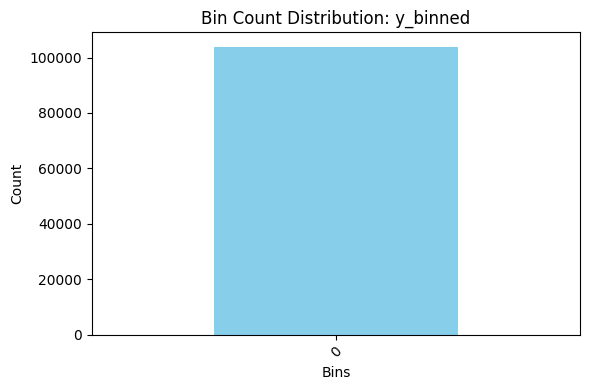

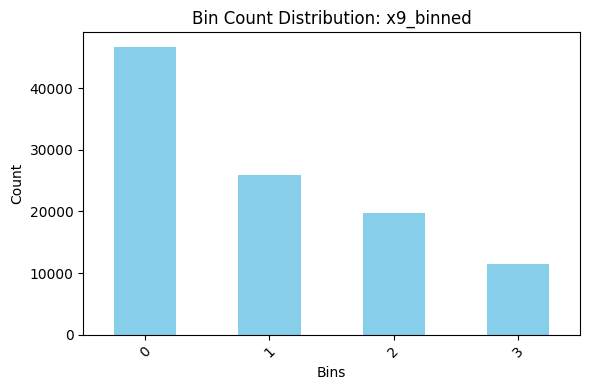

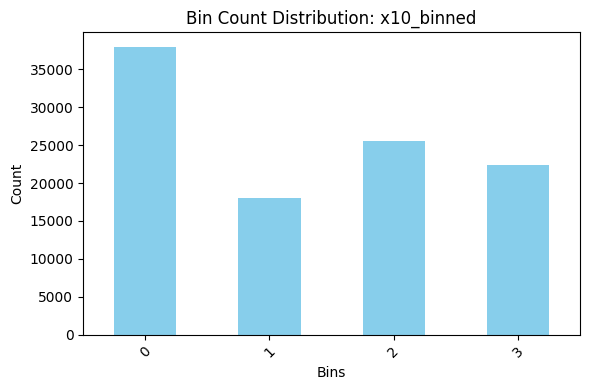

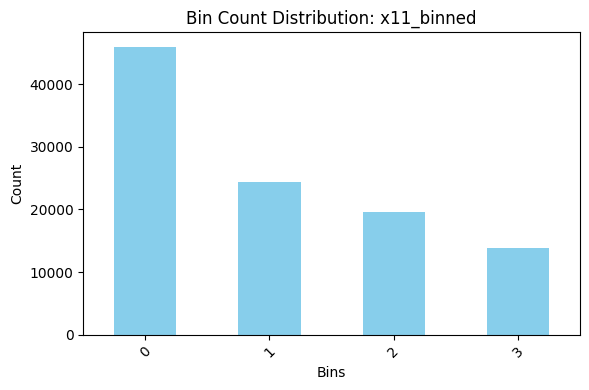

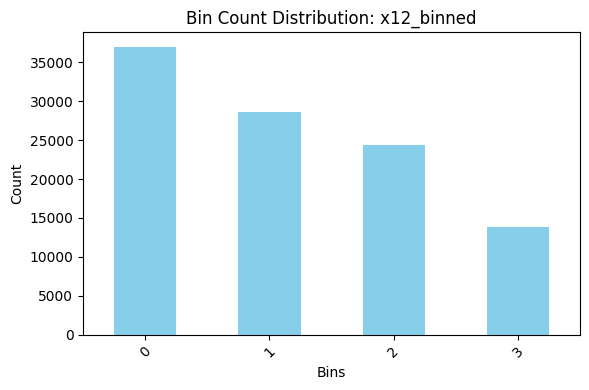

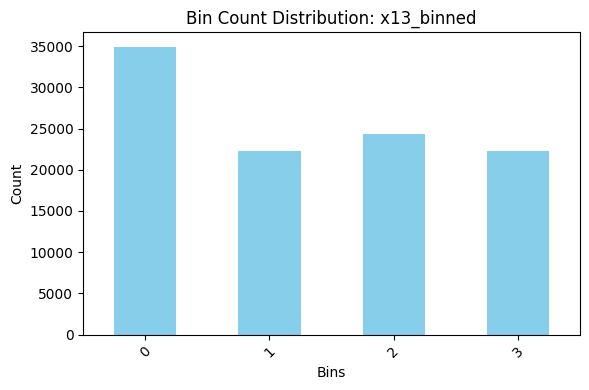

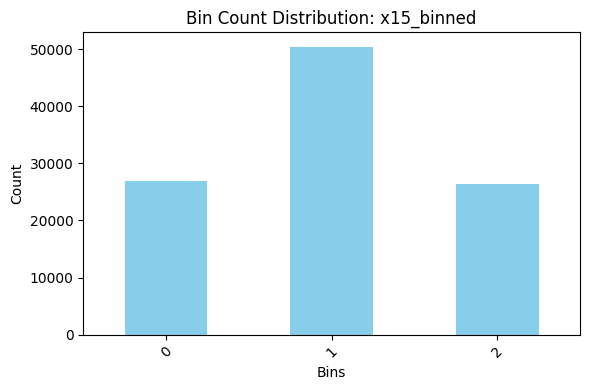

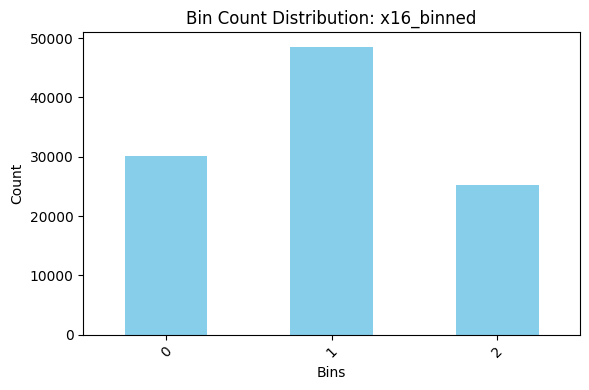

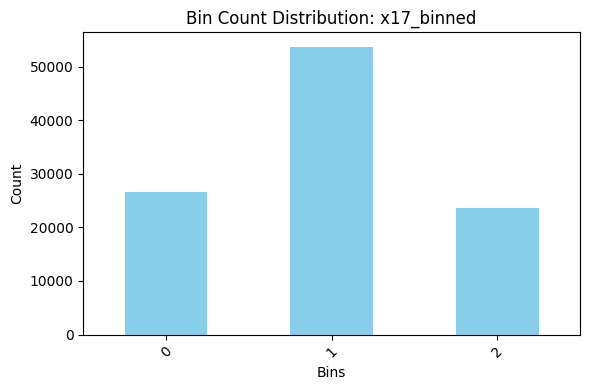

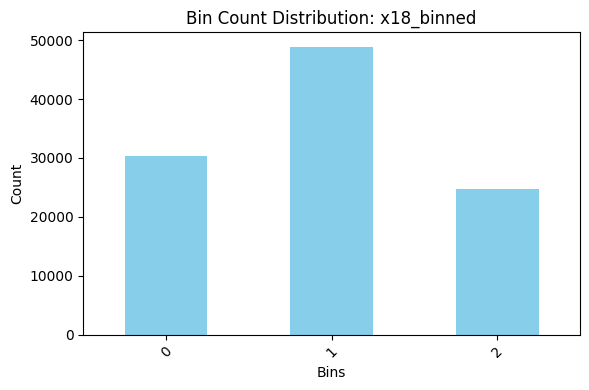

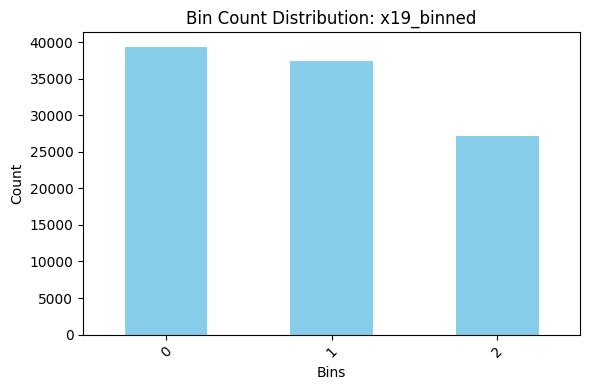

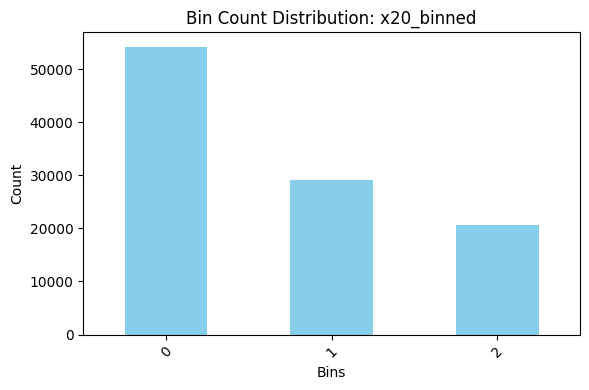

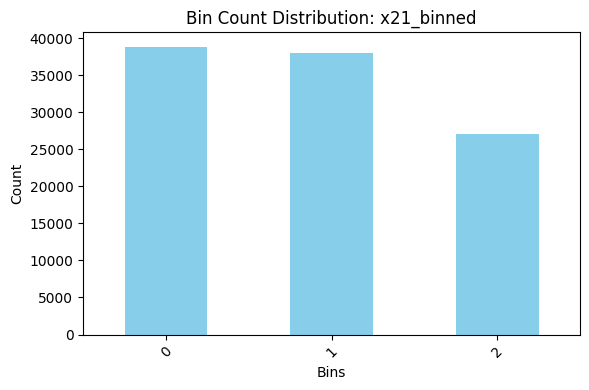

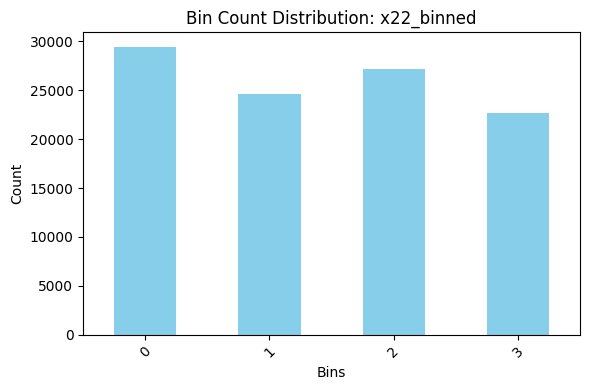

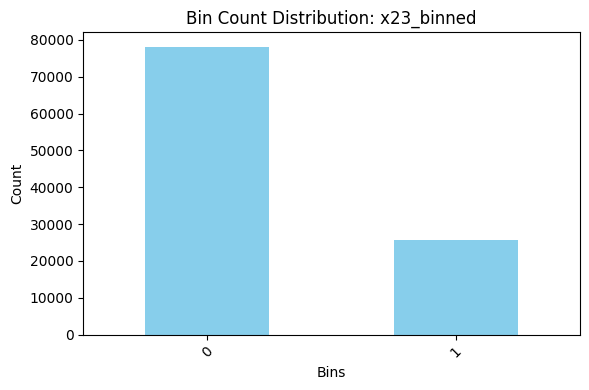

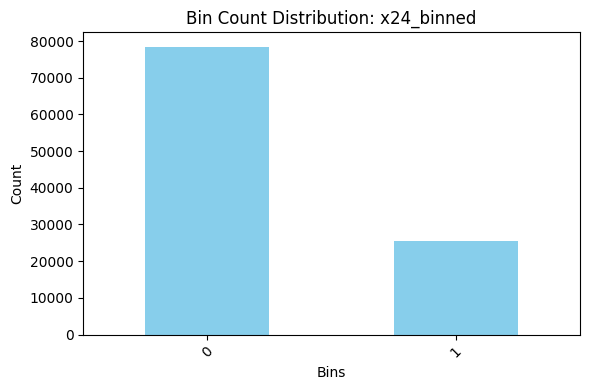

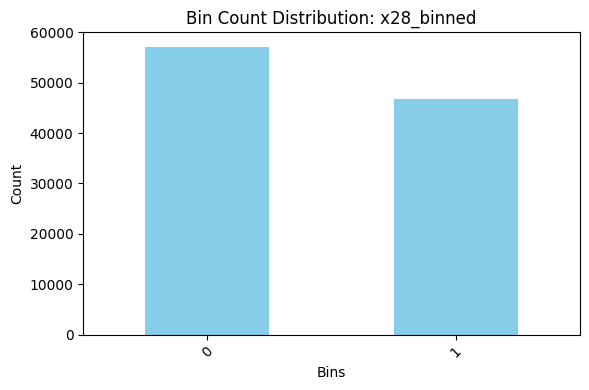

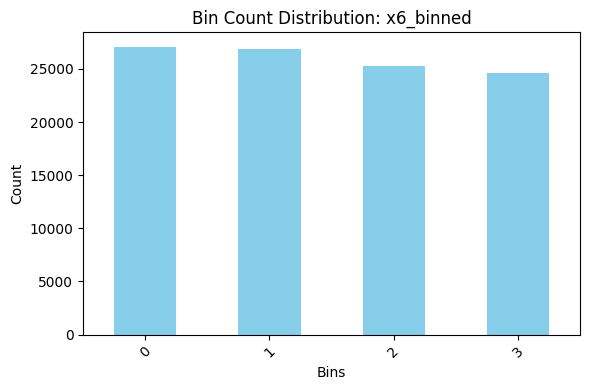

In [ ]:
# Step 11b: Binned Feature Distributions
# Create bar plots for each binned column to show bin counts

binned_cols = [col for col in df.columns if '_binned' in col]
import matplotlib.pyplot as plt

print(f"Creating distribution plots for {len(binned_cols)} binned features...")

for col in binned_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bin Count Distribution: {col}')
    plt.xlabel('Bins (0=Q1, 1=Q2, 2=Q3, 3=Q4)')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

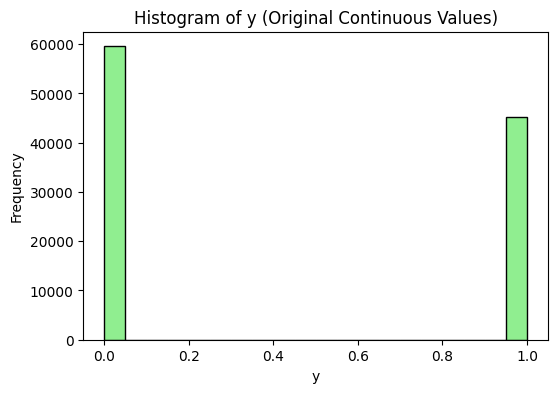

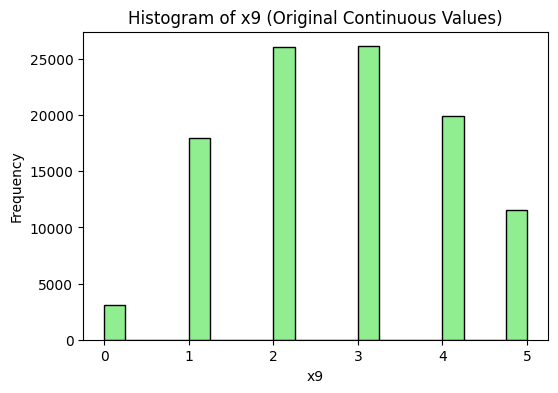

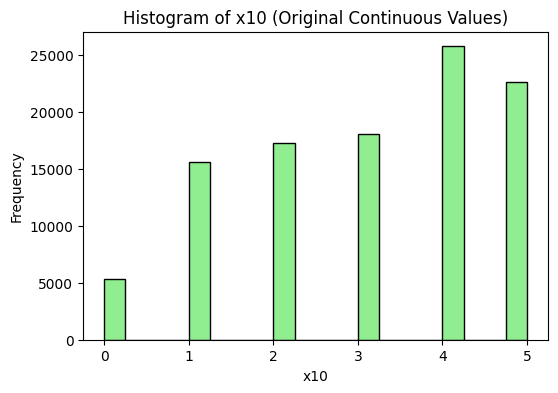

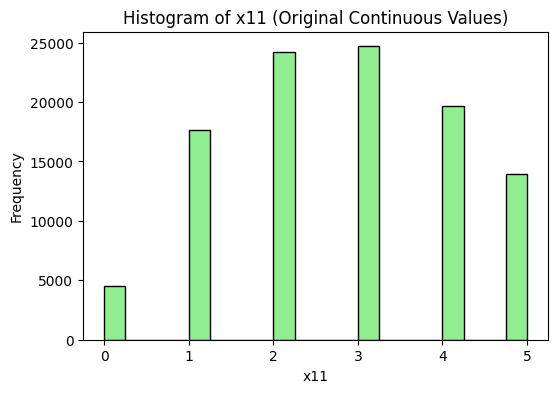

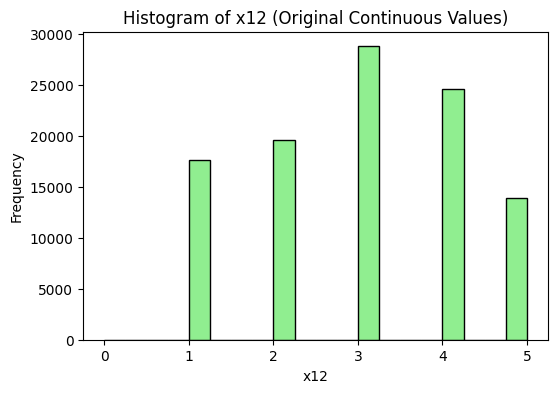

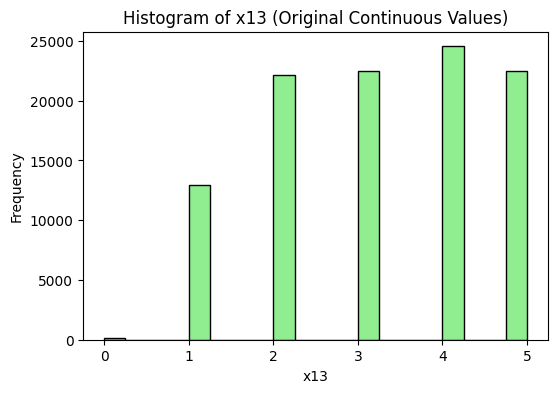

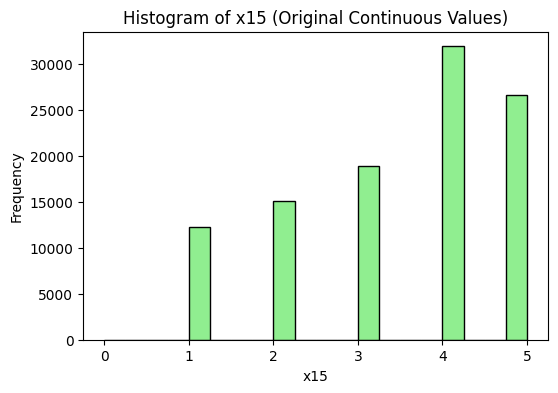

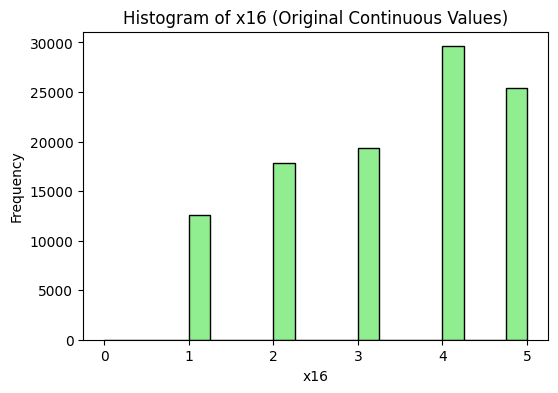

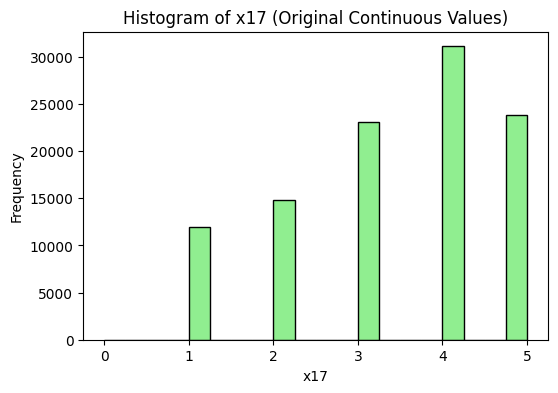

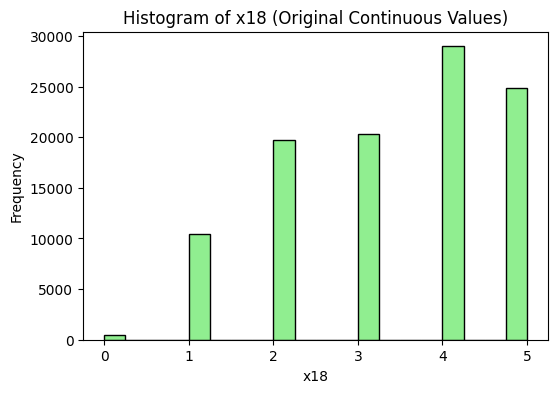

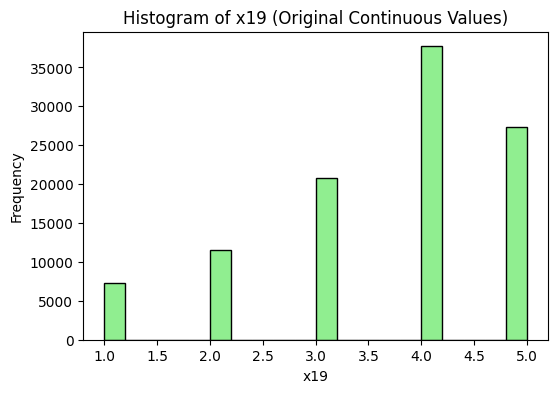

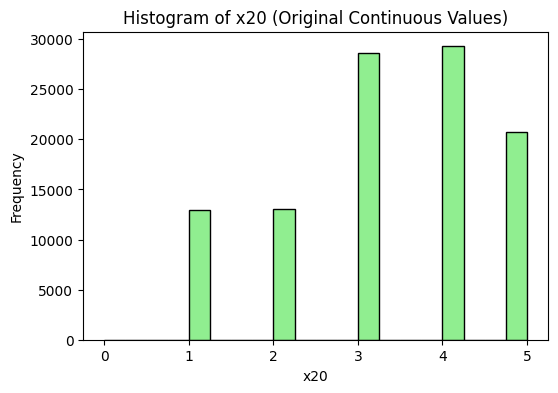

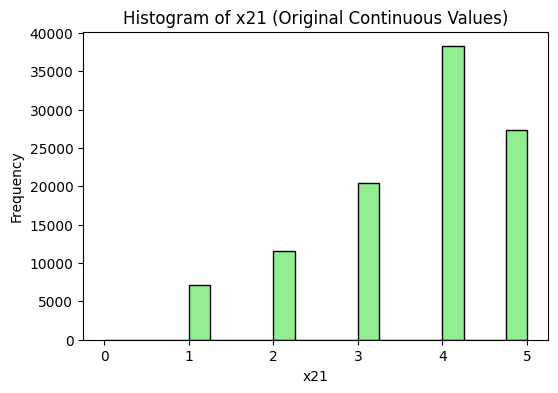

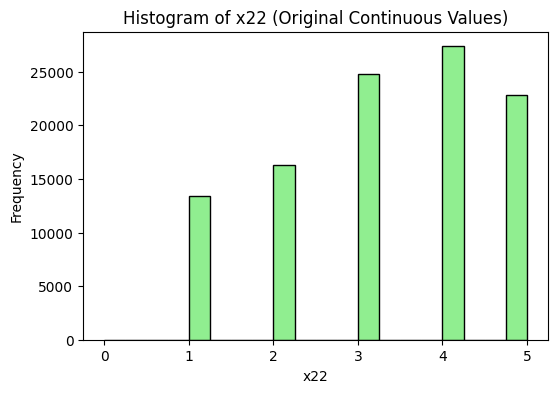

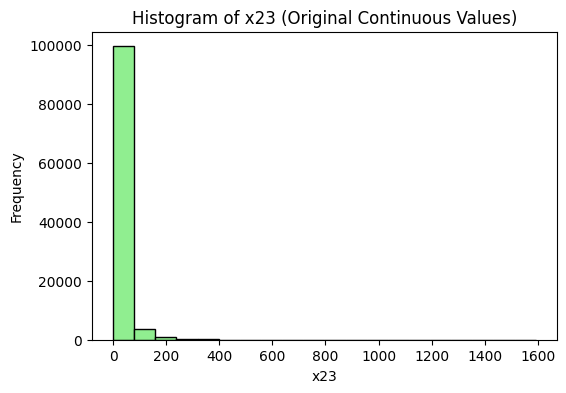

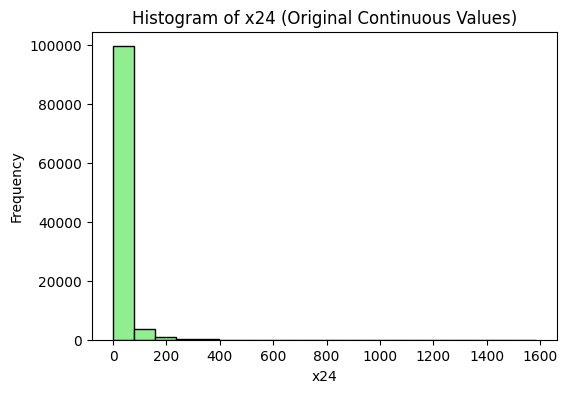

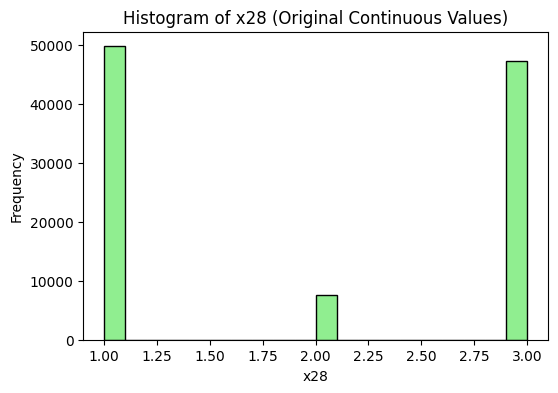

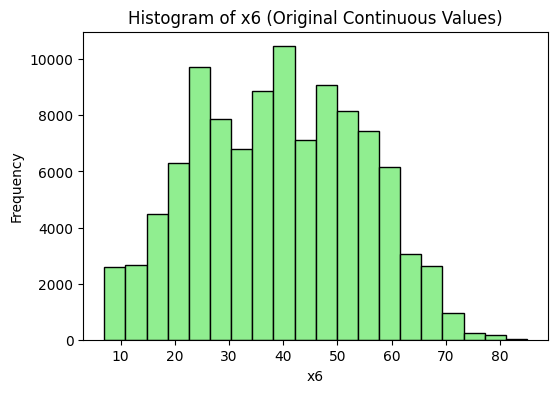

In [ ]:
# Step 11c: Histograms of Original Continuous Features
# Visualize original continuous feature distributions

for col in [c.replace('_binned','') for c in binned_cols if c.replace('_binned','') in df.columns]:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Histogram of {col} (Original Continuous Values)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

['y', 'x9', 'x10', 'x11', 'x12', 'x13', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x28', 'x6', 'x25_L_C', 'x26_PT', 'x3_Male', 'x14_1', 'x14_2', 'x14_3', 'x14_4', 'x14_5']


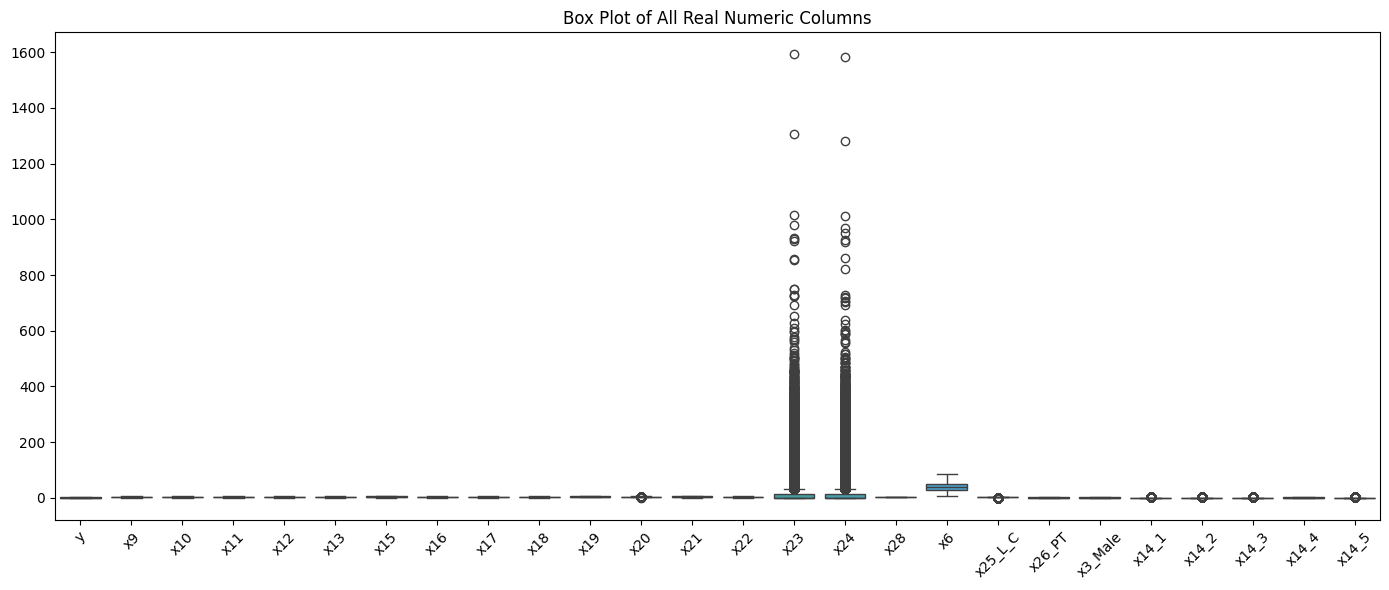

In [ ]:
# Step 11d: Box Plots and Histograms of Real Numeric Columns
# Identify and visualize non-binned numeric features

real_numeric_cols = [col for col in df.select_dtypes(include='number').columns if '_binned' not in col]
print(f"Real numeric columns: {real_numeric_cols}\n")

# Box plot to show distribution and outliers
plt.figure(figsize=(14,6))
sns.boxplot(data=df[real_numeric_cols])
plt.title("Box Plot of All Real Numeric Columns (showing outliers)")
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

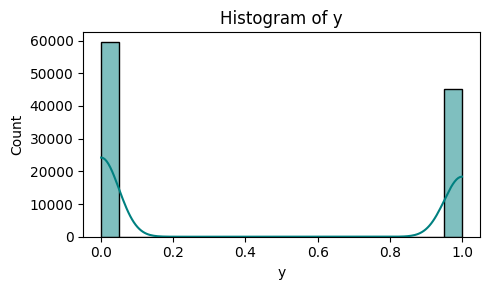

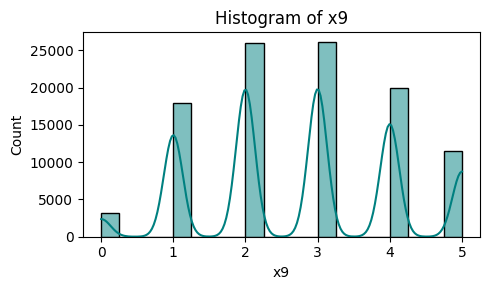

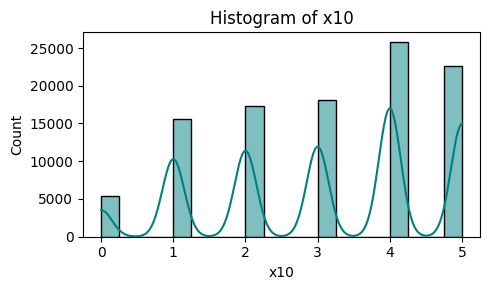

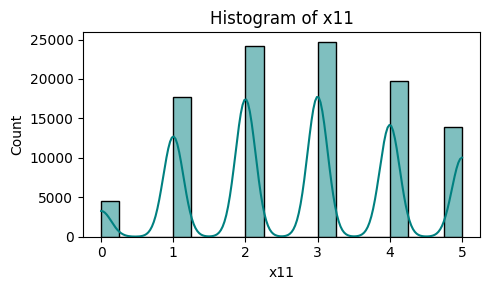

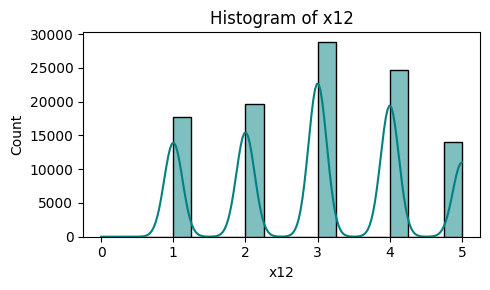

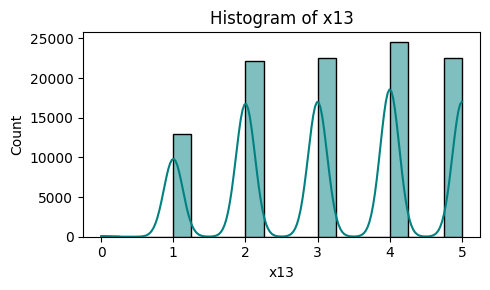

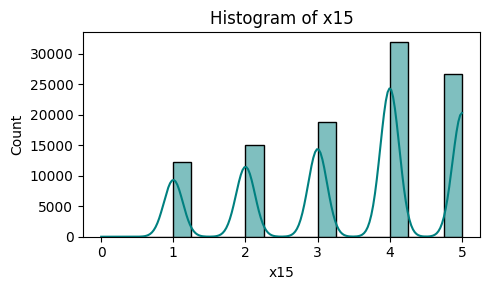

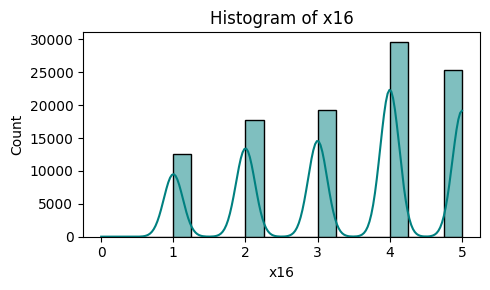

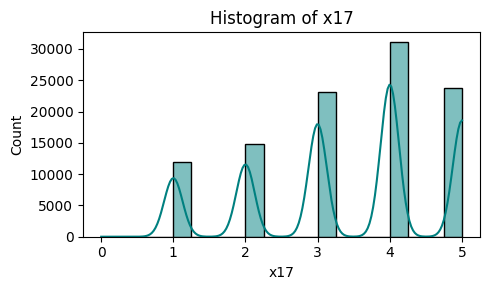

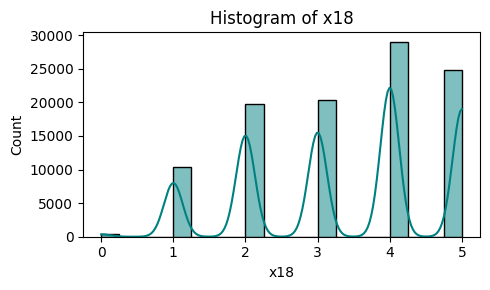

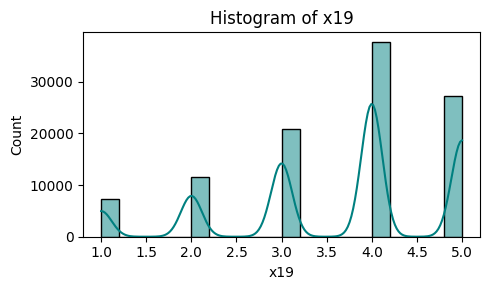

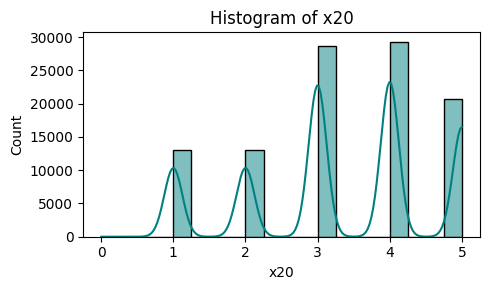

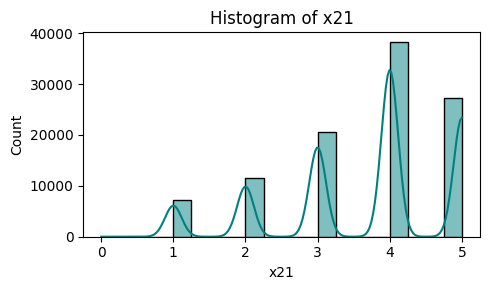

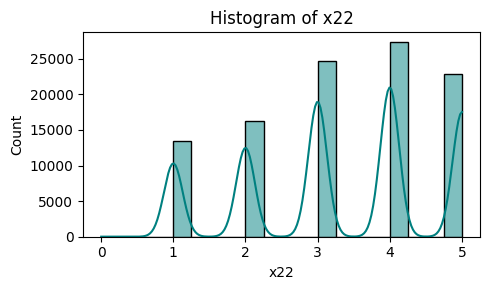

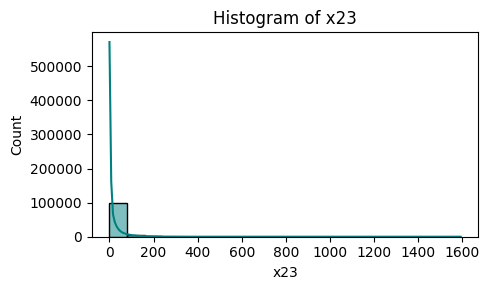

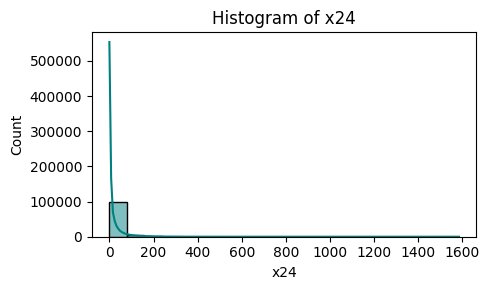

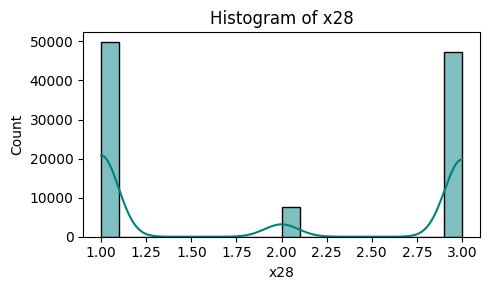

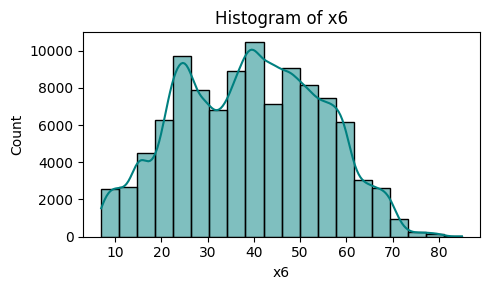

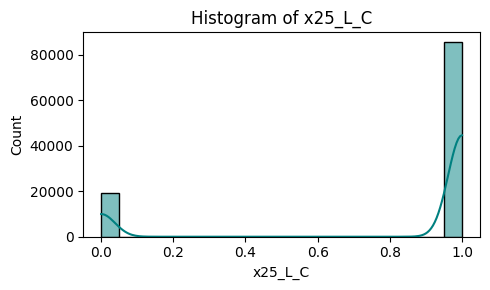

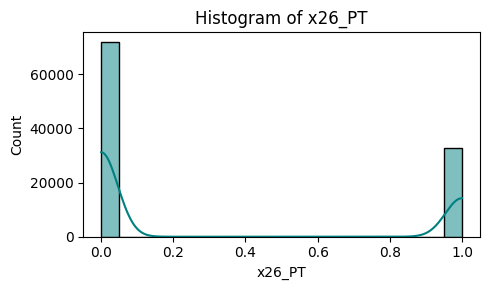

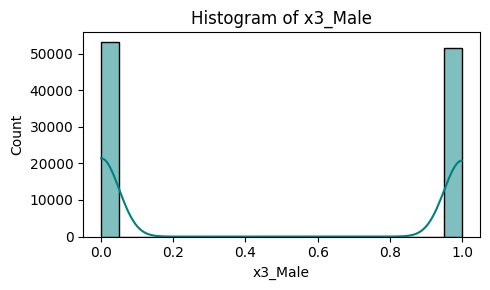

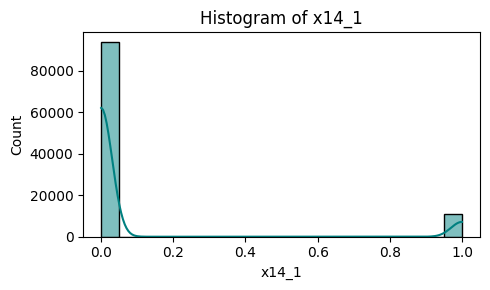

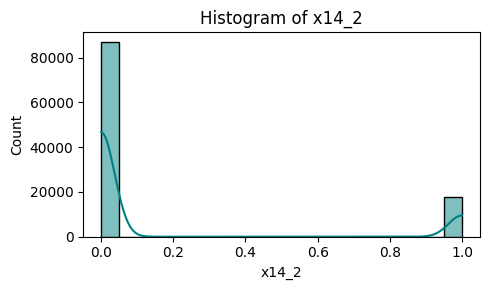

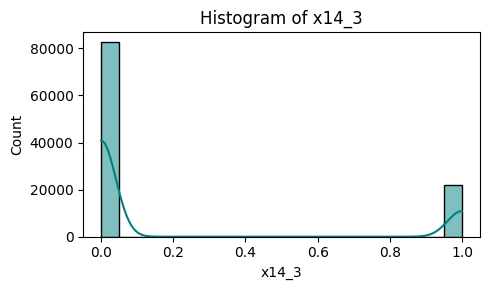

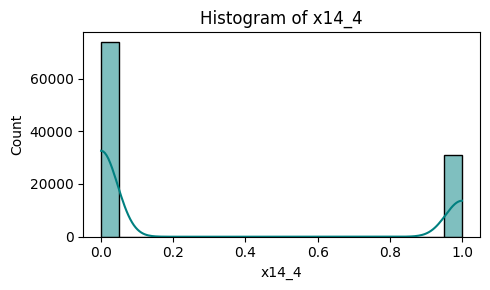

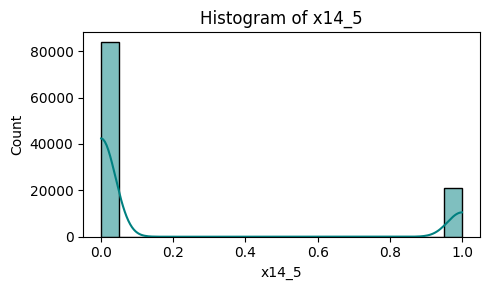

In [ ]:
# Step 11e: Histograms with KDE for numeric features
# Show distribution with kernel density estimation

for col in real_numeric_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, color='teal', bins=20)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [ ]:
# Step 12: Remove Outliers Using IQR Method
# Define a function to detect and remove outliers using the Interquartile Range (IQR) method

def remove_outliers_iqr(df, column):
    """
    Remove outliers from a column using the IQR method.
    
    Parameters:
    - df: DataFrame
    - column: Column name to remove outliers from
    
    Returns:
    - Cleaned DataFrame with outliers removed
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data to keep only values within bounds
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    outliers_removed = len(df) - len(df_cleaned)
    print(f"{column}: Q1={Q1}, Q3={Q3}, IQR={IQR}")
    print(f"{column}: Lower bound={lower_bound}, Upper bound={upper_bound}")
    print(f"{column}: Removed {outliers_removed} outliers\n")
    return df_cleaned

# Apply outlier removal to columns x23 and x24
print("Removing outliers from x23 and x24...")
for col in ['x23', 'x24']:
    df = remove_outliers_iqr(df, col)

print(f"Dataset shape after outlier removal: {df.shape}")

x23: Removed 14529 outliers
x24: Removed 12302 outliers


## Step 12: Outlier Detection and Removal

Identify and remove outliers using the Interquartile Range (IQR) method:
- **IQR Method**: Remove values beyond Q1 - 1.5*IQR and Q3 + 1.5*IQR
- Applied to columns **x23** and **x24** which showed extreme values
- Helps improve model robustness by removing anomalous data points

In [ ]:
# Step 13: Remove Binned Columns and Keep Only Numeric Features
# Select only numeric columns (excluding binned versions) for the final dataset

numeric_cols = [col for col in df.select_dtypes(include='number').columns if '_binned' not in col]
print(f"Keeping {len(numeric_cols)} numeric features for modeling")
print(f"Numeric features: {numeric_cols}\n")

df = df[numeric_cols]

print(f"Final dataset shape: {df.shape}")
print(f"Final dataset info:")
print(df.info())

## Step 13: Prepare Final Dataset

Remove binned columns and keep only numeric features for modeling:
- Binned columns were used for visualization and exploration
- Final dataset contains only original continuous features and encoded categorical features

In [ ]:
# Step 14: Export Cleaned Dataset
# Save the cleaned and preprocessed data to CSV for model training

output_file = 'cleaned_data_project3.csv'
df.to_csv(output_file, index=False)

print(f"✓ Cleaned dataset successfully exported to '{output_file}'")
print(f"\nFinal Dataset Summary:")
print(f"  - Shape: {df.shape}")
print(f"  - Features: {len(numeric_cols)}")
print(f"  - Samples: {len(df)}")
print(f"\nData Cleaning Pipeline Complete!")

## Step 14: Export Cleaned Dataset

Save the cleaned and preprocessed dataset to a CSV file for use in model training:
- **Output file**: `cleaned_data_project3.csv`
- Contains all processed features ready for machine learning models